## Instacart Capstone Project

#### QUESTIONS TO ANSWER USING THE DATA
1.	How many products?
2.	How many aisles?
3.	How many department?
4.	How many customers?
5.	How many total orders?
6.	Are there missing data? What type of missing data?
7.	When are the peak hours (orders>100,000)? When is the orders highest and lowest?
8.	What day of the week has the highest and lowest order volume?
9.	What is the probability of each product being ordered?
10.	What is the probability of each department being ordered from?
11.	What is the probability of each aisle being ordered from?
12.	Can I identify meat eaters, vegetarian, vegan their percentage in the entire customer list?
13.	What is the probability of customers being meat eater, vegetarian or vegan
14.	From what aisle will vegan usually get from?
15.	What products appear in all customer A orders? – These products will have high probability being reordered by customer A
16.	How many orders for each customer?
17.	What is the average number of products for across all orders for each customer?
18.	Can I Identify if the customer is a daily, weekly, bimonthly or monthly buyer?
19.	What is the probability that customer is daily, weekly, bimonthly or monthly buyer
20.	Is there a pattern of what day customer buy from Instacart?
21.	Using average number of product per order for each customer, and probability of product to be reordered by customer, can I predict products that will be reordered by customer?
22.	Can I predict the right which of the predicted products to reorder will be added to cart from 1st to last?


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

## Q1. How many products (49,688 total products)

In [2]:
prod=pd.read_csv('products.csv')
prod.head()
prodnum=prod.product_id.size     #number of products available
prod.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [3]:
prodnum

49688

In [4]:
prod.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

## Q2. How many aisles? (134 total aisles)

In [5]:
aisles=pd.read_csv('aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [7]:
aisles.aisle.size

134

## Q3. How many departments?  (There are 21 Departments )

In [8]:
dep=pd.read_csv('departments.csv')     
dep.head()


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
depnum=dep.department_id.max()         # number of departments
depnum

21

In [10]:
dep.isnull().sum()                    #no missing values

department_id    0
department       0
dtype: int64

## Q4. How many customers (There are 206, 209 user_ids)


In [11]:
orders=pd.read_csv('orders.csv')
orders.head()    #order_dow days of the week

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
useruniq=orders.user_id.unique()
useruniq.size

206209

## Q5. How many total orders (There are 3, 421, 083 orders)


In [13]:
orders.order_id.count()  

3421083

In [14]:
ornumunique=orders.order_number.unique()
ornumunique.size

100

## There are 3 eval_set (prior, train, test) in the ORDERS data frame
Prior Set= 3,214,874 data,  Train Set = 131, 209 data, Test Set =75,000 data

In [15]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

## Q6. Are there missing data? 
### (Yes only in "orders" DF. MAR type - 206, 209 "NaN" in days_since_prior_order are the first time the 206,209 user's first order.)

In [16]:
orders.isnull().sum()      #missing values in days_since_prior_order = users first order in INSTACART

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

## Q7. When are peak hours when order>100,000? (8am to 10pm)

### When are orders highest and lowest? (lowest at 3am and highest at 10am)

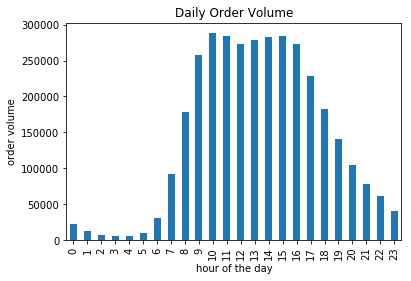

In [491]:
hourdist=orders['order_hour_of_day'].value_counts().sort_index()
hourdist.plot(kind='bar')
_=plt.xlabel('hour of the day')
_=plt.ylabel('order volume')
_=plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.title('Daily Order Volume')

In [18]:
## These are the peak hours (8-20 orders are over 100,000)
hourdist[hourdist>100000]

8     178201
9     257812
10    288418
11    284728
12    272841
13    277999
14    283042
15    283639
16    272553
17    228795
18    182912
19    140569
20    104292
Name: order_hour_of_day, dtype: int64

In [19]:
hourdist.idxmax()

10

In [20]:
hourdist.idxmin()

3

## Q8. What day of the week is order volume higest and lowest?                                                    

## (Order Volume is highest on Mondays and lowest on Fridays)

In [21]:
orday=orders.order_dow.value_counts()

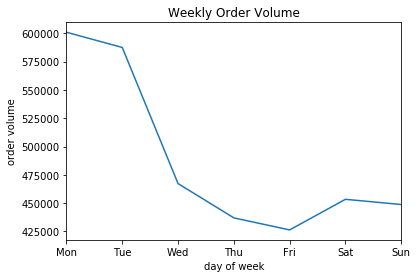

In [492]:
orday.sort_index().plot()
_=plt.xlabel('day of week')
_=plt.ylabel('order volume')
_=plt.xticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Weekly Order Volume')

In [23]:
orday.idxmax()


0

In [24]:
orday.idxmin()

4

## ORDERS TABLE IS SEPARATED TO THREE EVALUATION SETS - PRIOR, TRAIN, TEST

In [25]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [26]:
oprior=orders[orders.eval_set=='prior']
otrain=orders[orders.eval_set=='train']
otest=orders[orders.eval_set=='test']

In [27]:
oprior.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [28]:
otrain.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
10,1187899,1,train,11,4,8,14.0
25,1492625,2,train,15,1,11,30.0
49,2196797,5,train,5,0,11,6.0
74,525192,7,train,21,2,11,6.0
78,880375,8,train,4,1,14,10.0


In [29]:
otest.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0


## ORDER PRODUCTS PRIOR TABLE

In [30]:
prior=pd.read_csv('order_products__prior.csv')
prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [31]:
prior.shape

(32434489, 4)

In [32]:
prior.order_id.unique().size

3214874

In [33]:
prior.isnull().sum()         # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [34]:
prior.order_id.value_counts().head()

1564244    145
790903     137
61355      127
2970392    121
2069920    116
Name: order_id, dtype: int64

## ORDER PRODUCTS TRAIN TABLE

In [35]:
train=pd.read_csv('order_products__train.csv')
train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [36]:
train.isnull().sum()     # no missing values

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [37]:
samp=pd.read_csv('sample_submission.csv')
samp.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [38]:
samp.isnull().sum()     # no missing values

order_id    0
products    0
dtype: int64

## MERGING TABLES


### USING TRAIN DATA

In [39]:
alltrain=otrain.merge(train)
alltrain=alltrain.merge(prod)
alltrain=alltrain.merge(dep)
alltrain=alltrain.merge(aisles)


In [40]:
alltrain.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks


In [41]:
#Average number of products per order 
alltrain.groupby('order_id')['product_name'].size().mean()

10.552759338155157

### USING PRIOR DATA

In [42]:
allprior=oprior.merge(prior)
allprior=allprior.merge(prod)
allprior=allprior.merge(dep)
allprior=allprior.merge(aisles)
allprior

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,beverages,soft drinks
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,beverages,soft drinks
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,beverages,soft drinks
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,beverages,soft drinks
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,beverages,soft drinks
5,3367565,1,prior,6,2,7,19.0,196,1,1,Soda,77,7,beverages,soft drinks
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,beverages,soft drinks
7,3108588,1,prior,8,1,14,14.0,196,2,1,Soda,77,7,beverages,soft drinks
8,2295261,1,prior,9,1,16,0.0,196,4,1,Soda,77,7,beverages,soft drinks
9,2550362,1,prior,10,4,8,30.0,196,1,1,Soda,77,7,beverages,soft drinks


In [43]:
allprior.shape

(32434489, 15)

In [44]:
alltrain.shape

(1384617, 15)

## ALLTRAIN TABLE

## Q9. What is the probability of a specific product being ordered?

In [45]:
## Probability of Products being ordered using alltrain table 
ProbA=alltrain.product_name.value_counts()
ProbA=pd.DataFrame(ProbA)
ProbA['P(ordered)']=ProbA['product_name']/alltrain.product_name.size
ProbA.head(5)

,product_name,P(ordered)
Banana,18726,0.013524
Bag of Organic Bananas,15480,0.011180
Organic Strawberries,10894,0.007868
Organic Baby Spinach,9784,0.007066
Large Lemon,8135,0.005875


## Q10. What is the probability of each department being ordered from?


In [46]:
ProbD=alltrain.department.value_counts()
ProbD=pd.DataFrame(ProbD)
ProbD['P(ordered)']=ProbD['department']/alltrain.department.size
ProbD.head(5)

,department,P(ordered)
produce,409087,0.295451
dairy eggs,217051,0.156759
snacks,118862,0.085845
beverages,114046,0.082366
frozen,100426,0.072530


## Q11. What is the probability of each aisle being ordered from?


In [47]:
ProbB=alltrain.aisle.value_counts()
ProbB=pd.DataFrame(ProbB)
ProbB['P(ordered)']=ProbB['aisle']/alltrain.aisle.size
ProbB.head(5)

,aisle,P(ordered)
fresh vegetables,150609,0.108773
fresh fruits,150473,0.108675
packaged vegetables fruits,78493,0.056689
yogurt,55240,0.039896
packaged cheese,41699,0.030116


## Q12. Can you classify the customer as MEAT EATER,  VEGETARIAN, VEGAN?

### MEAT EATERS 
(will order from aisle_id = 5, 7, 15, 34, 35, 39, 49, 95, 96, 106, 122)

In [48]:
Train=alltrain.sort_values(by='user_id')
Meat1=Train[Train.aisle_id==5].sort_values(by='user_id')
Meat2=Train[Train.aisle_id==7].sort_values(by='user_id')
Meat3=Train[Train.aisle_id==15].sort_values(by='user_id')
Meat4=Train[Train.aisle_id==34].sort_values(by='user_id')
Meat5=Train[Train.aisle_id==35].sort_values(by='user_id')
Meat6=Train[Train.aisle_id==39].sort_values(by='user_id')
Meat7=Train[Train.aisle_id==49].sort_values(by='user_id')
Meat8=Train[Train.aisle_id==95].sort_values(by='user_id')
Meat9=Train[Train.aisle_id==96].sort_values(by='user_id')
Meat10=Train[Train.aisle_id==106].sort_values(by='user_id')
Meat11=Train[Train.aisle_id==122].sort_values(by='user_id')

#Meat Eaters DataFrame
MeatE=pd.concat([Meat1,Meat2,Meat3, Meat4,Meat5, Meat6, Meat7, Meat8, Meat9, Meat10, Meat11])

# Number of meat eaters out of 131209  customers
MeatEnumcust=MeatE.user_id.unique()
MeatEnumcust.size


38858

In [49]:
MeatEnumcust

array([    14,     43,     44, ..., 205422, 205528, 205825], dtype=int64)

In [50]:
traincust=alltrain.user_id.unique().size
traincust

131209

##  Meat & Seafood Eaters (38,858 Customers)

In [355]:
MeatEnumcust.size

38858

In [52]:
#MeatE is taken out of Train DF
NonMeat=Train.merge(MeatE, how='outer', indicator=True)
NonMeat=NonMeat[NonMeat._merge=='left_only']
NonMeat.shape

(1327866, 16)

In [53]:
Train.shape

(1384617, 15)

In [54]:
MeatE.user_id.unique().size

38858

In [55]:
MeatE.shape

(56751, 15)

In [56]:
alltrain.shape

(1384617, 15)

## MeatEaters & meat+ Fish eaters (34,287 customers)

In [493]:
## No Fish Eaters
OnlyMeat=pd.concat([Meat1,Meat2,Meat5, Meat7, Meat9, Meat10, Meat11])
NoFish=OnlyMeat.user_id.unique()
NoFish.size


34287

In [382]:
Meaties=pd.DataFrame(NoFish, columns=['user_id'])
Meaties['category']='Meat Lovers'
Meaties.head()

,user_id,category
0,14,Meat Lovers
1,43,Meat Lovers
2,44,Meat Lovers
3,53,Meat Lovers
4,201,Meat Lovers


## Pescatarians(4,571 customers)

In [494]:
Fish=pd.concat([Meat3, Meat4, Meat6, Meat8])
Fishy=Fish.user_id.unique()
Fishy.size

7727

In [495]:
Pescatarians=np.setdiff1d(Fishy, NoFish)
Pescatarians.size

4571

In [496]:
Pescats=pd.DataFrame(Pescatarians, columns=['user_id'])
Pescats['category']='Pescatarian'
Pescats.head()


,user_id,category
0,8,Pescatarian
1,47,Pescatarian
2,161,Pescatarian
3,211,Pescatarian
4,250,Pescatarian


## Vegetarians (Vegetarians & Vegans - Total of 92,351 customers)

In [57]:
## remove all MeatE user_ids
Veg=Train.loc[~Train.user_id.isin(MeatEnumcust)]
Veg.user_id.unique().size

92351

In [58]:
## Vegans dont eat eggs, yogurt, cheese, milk and dairies

In [127]:
#egg eaters
Vegegg=Veg[Veg.aisle_id==86]
Vegegg.user_id.unique().size

10737

In [225]:
 #yogurt eaters
Vegyogurt=Veg[Veg.aisle_id==120]
Vegyogurt.user_id.unique().size    

20344

In [226]:
##Vegan Yogurts
VeganYog1=Vegyogurt[Vegyogurt.product_name.str.contains('Non-Dairy')]
VeganYog1.shape


(41, 15)

In [229]:
##NonVegan Yogurts
NonVeganYogurts=Vegyogurt.merge(VeganYog1, how='outer', indicator=True)
NonVeganYogurts=NonVeganYogurts[NonVeganYogurts._merge=='left_only']
NonVeganYogurts.shape

(33373, 16)

In [230]:
Vegyogurt.shape

(33414, 15)

In [260]:
#cheese
Vegycheam=Veg[(Veg.aisle_id==2)| (Veg.aisle_id==21) | (Veg.aisle_id==108)]
Vegycheam.shape


(30348, 15)

In [498]:
##Vegan Cheese
# Non-Dairy
VeganCheam1=Vegycheam[Vegycheam.product_name.str.contains('Non-Dairy')]
VeganCheam1.shape

(0, 15)

In [262]:
#Soy Cheese
VeganCheam2=Vegycheam[Vegycheam.product_name.str.contains('Soy')]
VeganCheam2.shape

(3, 15)

In [265]:
##Cashew Cheese
VeganCheam3=Vegycheam[Vegycheam.product_name.str.contains('Cashew Cheese')]
VeganCheam3.shape


(6, 15)

In [269]:
#Almond Cheese
VeganCheam4=Vegycheam[Vegycheam.product_name.str.contains('Almond')]
VeganCheam4.shape


(80, 15)

In [270]:
VeganCheam5=Vegycheam[Vegycheam.product_name.str.contains('Cheese Alternative')]
VeganCheam5.shape


(156, 15)

In [278]:
## Vegan Cheese
VeganCheese=pd.concat([VeganCheam1, VeganCheam2, VeganCheam3, VeganCheam4, VeganCheam5])

VeganCheese.index.unique().size

195

In [281]:
## NonVeganCheese
NonVeganCheese=Vegycheam.merge(VeganCheese, how='outer', indicator=True)
NonVeganCheese=NonVeganCheese[NonVeganCheese._merge=='left_only']
NonVeganCheese.shape

(30153, 16)

In [283]:
Vegycheam.shape

(30348, 15)

In [145]:
## Milk drinkers
Milk=Veg[Veg.aisle_id==84]
Milk.user_id.unique().size


18185

In [279]:
Milk.head()


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
210985,1187899,1,train,11,4,8,14.0,27845,9,0,Organic Whole Milk,84,16,dairy eggs,milk
215893,1827621,13,train,13,0,21,8.0,4210,3,1,Whole Milk,84,16,dairy eggs,milk
210986,698604,34,train,6,4,13,30.0,27845,1,1,Organic Whole Milk,84,16,dairy eggs,milk
218768,1750084,50,train,68,3,9,7.0,31720,6,1,Organic Whole Milk,84,16,dairy eggs,milk
219924,2608424,72,train,13,2,14,30.0,38689,1,1,Organic Reduced Fat Milk,84,16,dairy eggs,milk


In [ ]:
## Vegan Milks

In [181]:
#Almond Milk
VeganM1=Milk[Milk.product_name.str.contains('Almond')]
VeganM1.shape

(201, 15)

In [200]:
#Cashew Milk
VeganM2=Milk[Milk.product_name.str.contains('Cashew')]
VeganM2.shape

(16, 15)

In [199]:
# Hemp Milk
VeganM3=Milk[Milk.product_name.str.contains('Hemp')]
VeganM3.shape

(7, 15)

In [191]:
# Non-Dairy
VeganM4=Milk[Milk.product_name.str.contains('Non-Dairy')]
VeganM4.shape

(57, 15)

In [205]:
#Coconut
VeganM5=Milk[Milk.product_name.str.contains('Coconut')]
VeganM5.shape

(260, 15)

In [213]:
## Vegan Milk
VeganMilk=pd.concat([VeganM1, VeganM2, VeganM3, VeganM4, VeganM5])
VeganMilk.index.unique().size

476

In [216]:
#NonVeganMilk
NonVeganMilk=Milk.merge(VeganMilk, how='outer', indicator=True)
NonVeganMilk=NonVeganMilk[NonVeganMilk._merge=='left_only']
NonVeganMilk.shape




(19698, 16)

In [217]:
Milk.shape

(20174, 15)

In [284]:
##cream eaters
cream=Veg[Veg.aisle_id==53]
cream.shape

(7806, 15)

In [291]:
VeganCream1=cream[cream.product_name.str.contains('Non-Dairy')]
VeganCream1.shape


(36, 15)

In [294]:
VeganCream2=cream[cream.product_name.str.contains('Coconut')]
VeganCream2.shape

(404, 15)

In [298]:
VeganCream3=cream[cream.product_name.str.contains('Soy')]
VeganCream3.shape

(8, 15)

In [300]:
VeganCream4=cream[cream.product_name.str.contains('Rice')]
VeganCream4.shape

(6, 15)

In [301]:
VeganCream5=cream[cream.product_name.str.contains('Almond')]
VeganCream5.shape

(404, 15)

In [305]:
##Vegan Creams
VeganCreams=pd.concat([VeganCream1, VeganCream2, VeganCream3, VeganCream4, VeganCream5])
VeganCreams.index.unique().size

454

In [306]:
## NonVegan Creams
NonVeganCreams=cream.merge(VeganCreams, how='outer', indicator=True)
NonVeganCreams=NonVeganCreams[NonVeganCreams._merge=='left_only']
NonVeganCreams.shape

(7352, 16)

In [307]:
cream.shape

(7806, 15)

## How many NonVegan Vegetarian Customers? (49,168 NonVegan Vegetarians)

In [360]:
NonVeganFood=pd.concat([Vegegg, NonVeganYogurts, NonVeganCheese, NonVeganMilk, NonVeganCreams])
NotVegan=NonVeganFood.user_id.unique()
NotVegan.size

49168

In [374]:
NonVeganVegetarian=pd.DataFrame(NotVegan, columns=['user_id'])
NonVeganVegetarian['category']='NonVegan'
NonVeganVegetarian.head()

,user_id,category
0,17,NonVegan
1,38,NonVegan
2,64,NonVegan
3,79,NonVegan
4,87,NonVegan


## How many are Vegan Customers? (43,183 Are Vegans)

In [361]:
AllVegans=Veg.loc[~Veg.user_id.isin(NotVegan)]
PureVegan=AllVegans.user_id.unique()
PureVegan.size

43183

In [362]:
PureVegan

array([    21,     24,     30, ..., 206195, 206196, 206209], dtype=int64)

In [371]:
Vegan=pd.DataFrame(PureVegan, columns=['user_id'])
Vegan['category']='Vegan'
Vegan.head()

,user_id,category
0,21,Vegan
1,24,Vegan
2,30,Vegan
3,42,Vegan
4,49,Vegan


In [385]:
Train_users=pd.concat([Meaties, Pescats, NonVeganVegetarian, Vegan])
Train_users.shape

(131209, 2)

In [387]:
Train.user_id.unique().shape

(131209,)

## Q13. What is the probability that customer is meat eater, pescatarian, novegan, vegan?

In [444]:

Class=Train_users['category'].value_counts()
Class=pd.DataFrame(Class, columns=['category'])
Class['Probability']=Class.category/Class.category.sum()   # Probability same as percentage?
Class=Class.reset_index()
Class=Class.rename(columns={'index':'category', 'category': 'counts'})
Classi=Class.loc[:, ['category', 'Probability']]    
Train_users.merge(Classi)






,user_id,category,Probability
0,14,Meat Lovers,0.274768
1,43,Meat Lovers,0.274768
2,44,Meat Lovers,0.274768
3,53,Meat Lovers,0.274768
4,201,Meat Lovers,0.274768
5,238,Meat Lovers,0.274768
6,473,Meat Lovers,0.274768
7,495,Meat Lovers,0.274768
8,499,Meat Lovers,0.274768
9,558,Meat Lovers,0.274768


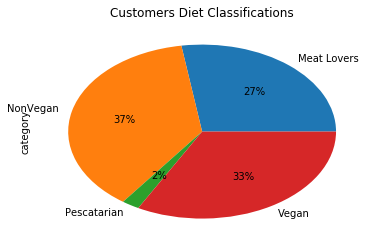

In [505]:
Train_users.category.value_counts().sort_index().plot(kind='pie', autopct='%1.0f%%')
plt.title('Customers Diet Classifications')

## Q17. What is the average number of products for each customer per order

In [479]:
Train.groupby('order_id')['product_name'].size().mean()   ## overall average products per order

10.552759338155157

In [483]:
Train.groupby('user_id')['order_id'].size()      # number of products ordered per customer


user_id
1         11
2         31
5          9
7          9
8         18
9         22
10         4
13         5
14        11
17         6
18        11
21         6
23        12
24         1
27        17
29        17
30         1
34         5
37        12
38        19
41        15
42         7
43        33
44         6
46         6
47         6
48        13
49         6
50         6
52        11
          ..
206159     1
206162     8
206164     2
206165    20
206167    17
206169     3
206170     7
206171     5
206172     3
206174    15
206175     9
206176     6
206177     6
206178    14
206181     9
206184     1
206185    11
206186     7
206188    18
206190    10
206191    23
206193     6
206195     6
206196    15
206198    13
206199    22
206200    19
206203    13
206205    19
206209     8
dtype: int64

In [484]:
Train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
378536,1187899,1,train,11,4,8,14.0,10258,6,1,Pistachios,117,19,snacks,nuts seeds dried fruit
367083,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,snacks,candy chocolate
331097,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,household,paper goods
485945,1187899,1,train,11,4,8,14.0,13032,7,1,Cinnamon Toast Crunch,121,14,breakfast,cereal


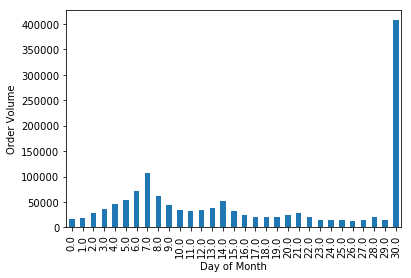

In [490]:
Freq=Train.days_since_prior_order.value_counts().sort_index()
Freq.plot(kind='bar')
plt.xlabel('Day of Month')
plt.ylabel('Order Volume')

In [ ]:
Train